In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\imreh\Desktop\Feynn Internship\Shoe-Sales.csv")

In [3]:
df.head()

,YearMonth,Shoe_Sales
0,1980-01,85
1,1980-02,89
2,1980-03,109
3,1980-04,95
4,1980-05,91


In [4]:
date = pd.date_range(start='1/1/2000', end='8/1/2015', freq='M')
date

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2014-10-31', '2014-11-30', '2014-12-31', '2015-01-31',
               '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31',
               '2015-06-30', '2015-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [5]:
# Adding the time stamp to the data frame
df['Time_Stamp'] = pd.DataFrame(date)
df.head()

,YearMonth,Shoe_Sales,Time_Stamp
0,1980-01,85,2000-01-31
1,1980-02,89,2000-02-29
2,1980-03,109,2000-03-31
3,1980-04,95,2000-04-30
4,1980-05,91,2000-05-31


In [6]:
df.set_index('Time_Stamp',inplace=True)
df.head()

,YearMonth,Shoe_Sales
Time_Stamp,,
2000-01-31,1980-01,85
2000-02-29,1980-02,89
2000-03-31,1980-03,109
2000-04-30,1980-04,95
2000-05-31,1980-05,91


In [7]:
df.tail()

,YearMonth,Shoe_Sales
Time_Stamp,,
2015-03-31,1995-03,188
2015-04-30,1995-04,195
2015-05-31,1995-05,189
2015-06-30,1995-06,220
2015-07-31,1995-07,274


In [8]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

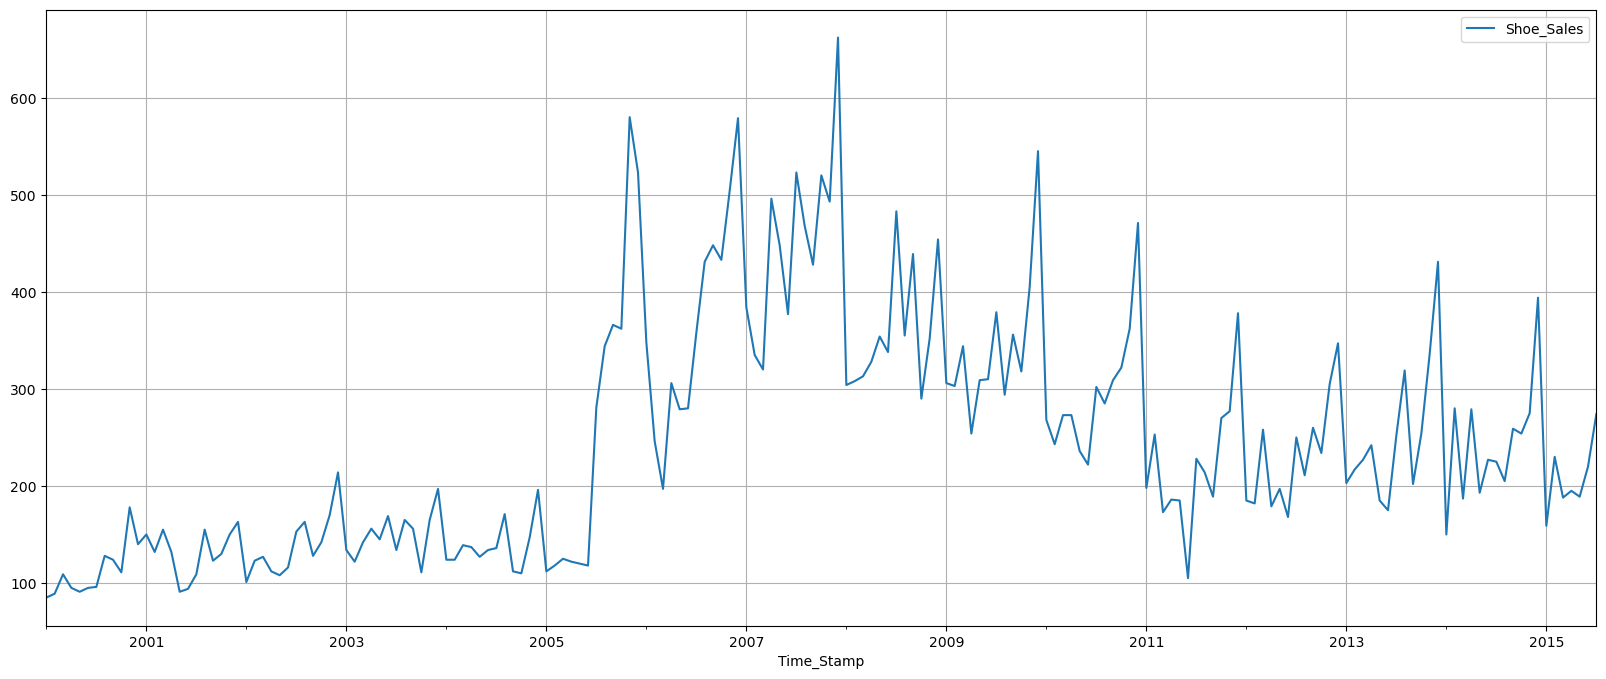

In [9]:
df.plot()
plt.grid();

In [10]:
df.describe()

,Shoe_Sales
count,187.000000
mean,245.636364
std,121.390804
min,85.000000
25%,143.500000
50%,220.000000
75%,315.500000
max,662.000000


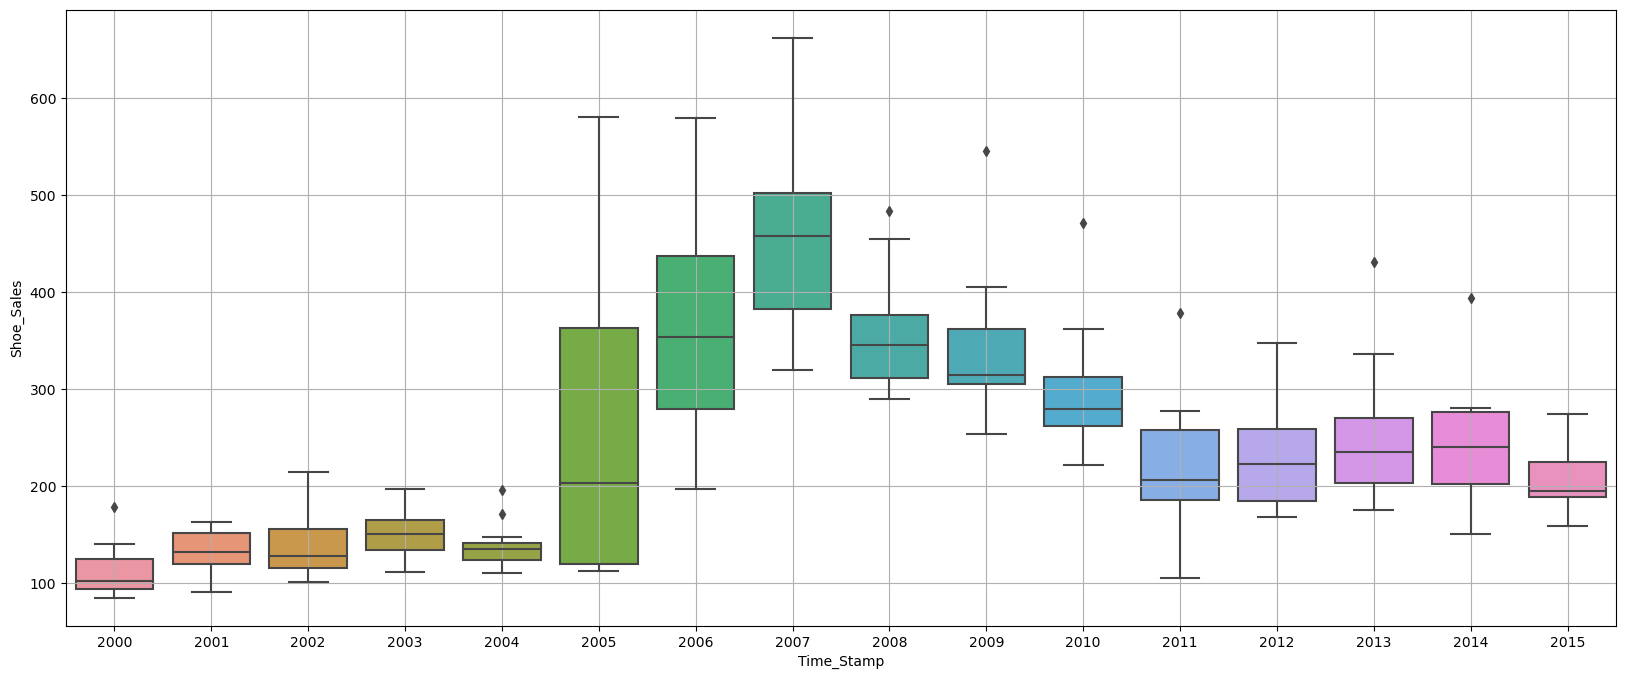

In [11]:
sns.boxplot(x = df.index.year,y = df['Shoe_Sales'])
plt.grid();

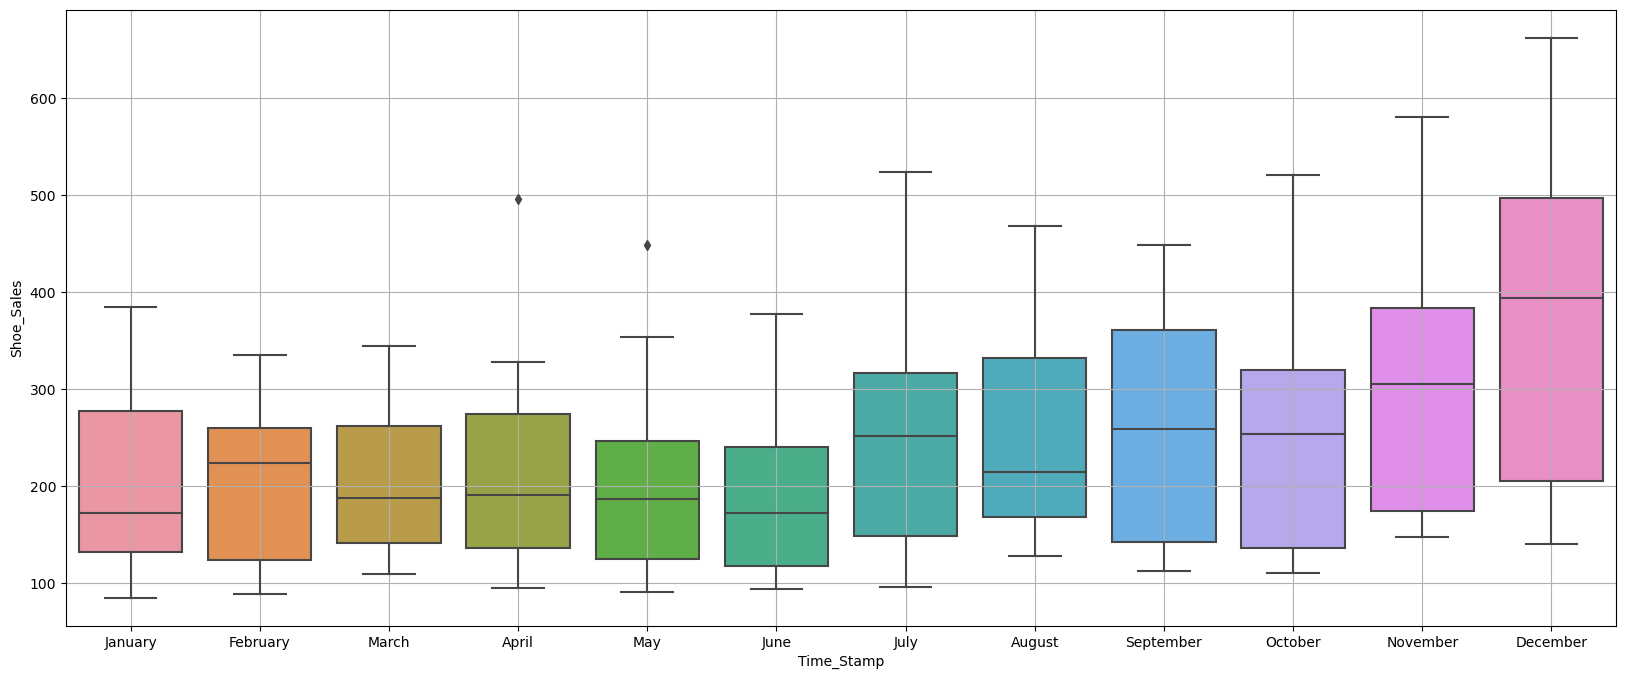

In [12]:
sns.boxplot(x = df.index.month_name(),y = df['Shoe_Sales'])
plt.grid();

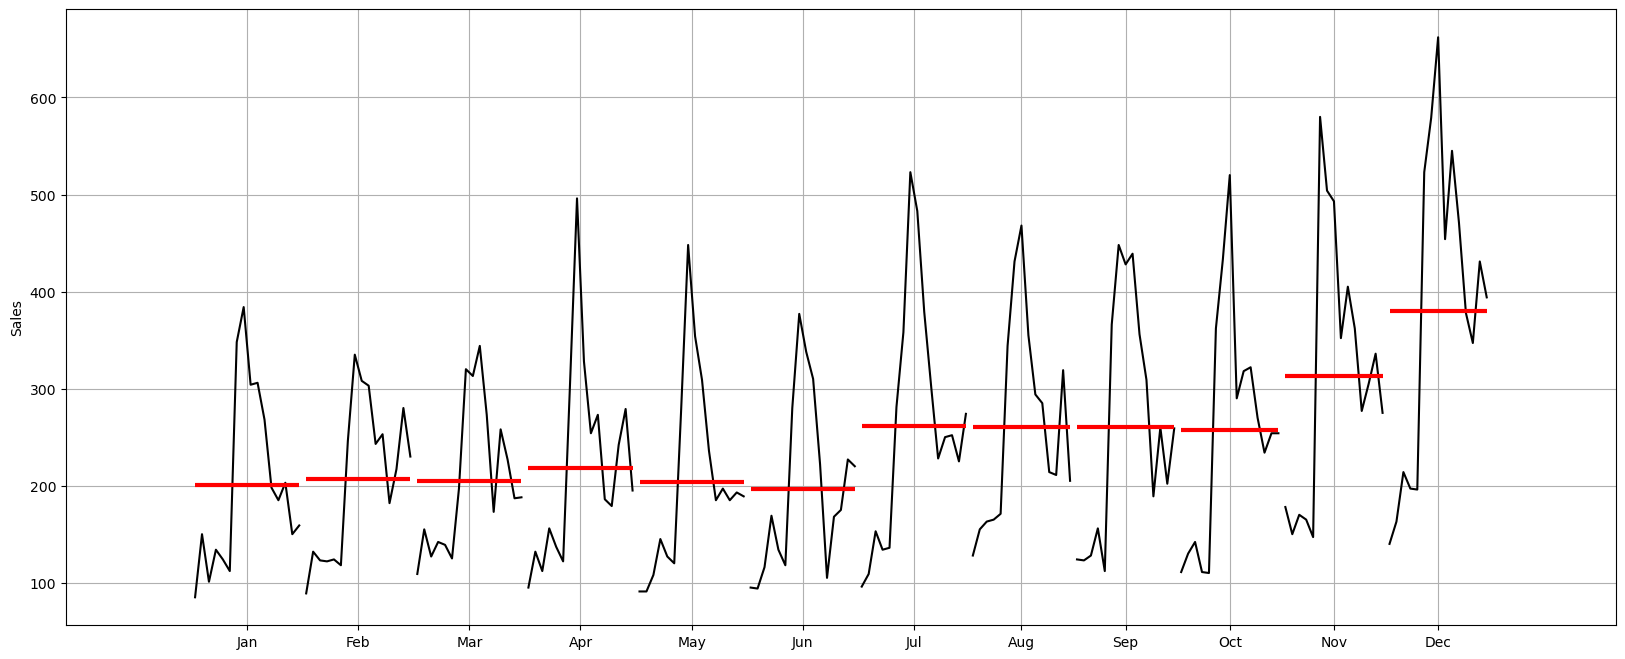

In [13]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df['Shoe_Sales'],ylabel='Sales')
plt.grid()

In [14]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Shoe_Sales', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

Time_Stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_Stamp,,,,,,,,,,,,
2000,85.0,89.0,109.0,95.0,91.0,95.0,96.0,128.0,124.0,111.0,178.0,140.0
2001,150.0,132.0,155.0,132.0,91.0,94.0,109.0,155.0,123.0,130.0,150.0,163.0
2002,101.0,123.0,127.0,112.0,108.0,116.0,153.0,163.0,128.0,142.0,170.0,214.0
2003,134.0,122.0,142.0,156.0,145.0,169.0,134.0,165.0,156.0,111.0,165.0,197.0
2004,124.0,124.0,139.0,137.0,127.0,134.0,136.0,171.0,112.0,110.0,147.0,196.0
2005,112.0,118.0,125.0,122.0,120.0,118.0,281.0,344.0,366.0,362.0,580.0,523.0
2006,348.0,246.0,197.0,306.0,279.0,280.0,358.0,431.0,448.0,433.0,504.0,579.0
2007,384.0,335.0,320.0,496.0,448.0,377.0,523.0,468.0,428.0,520.0,493.0,662.0
2008,304.0,308.0,313.0,328.0,354.0,338.0,483.0,355.0,439.0,290.0,352.0,454.0


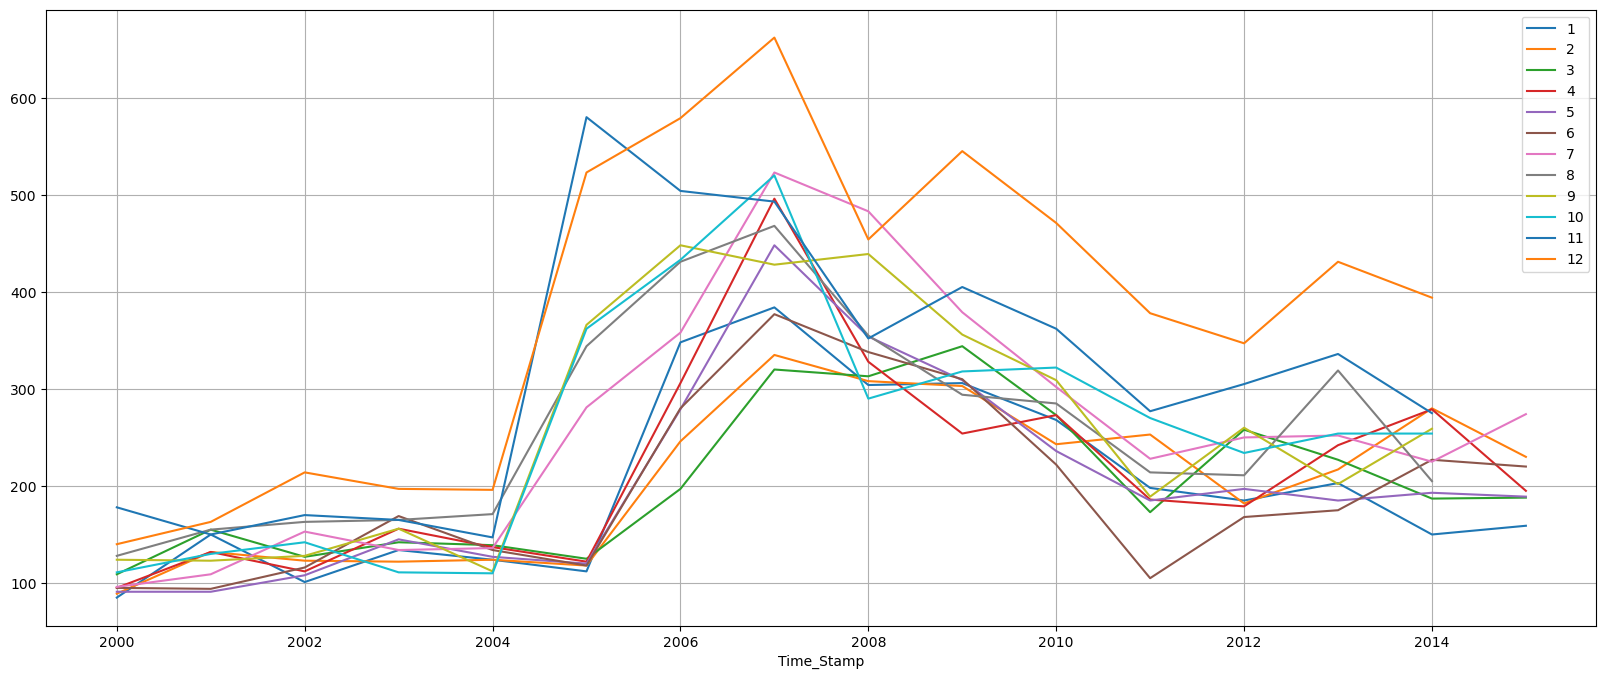

In [15]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

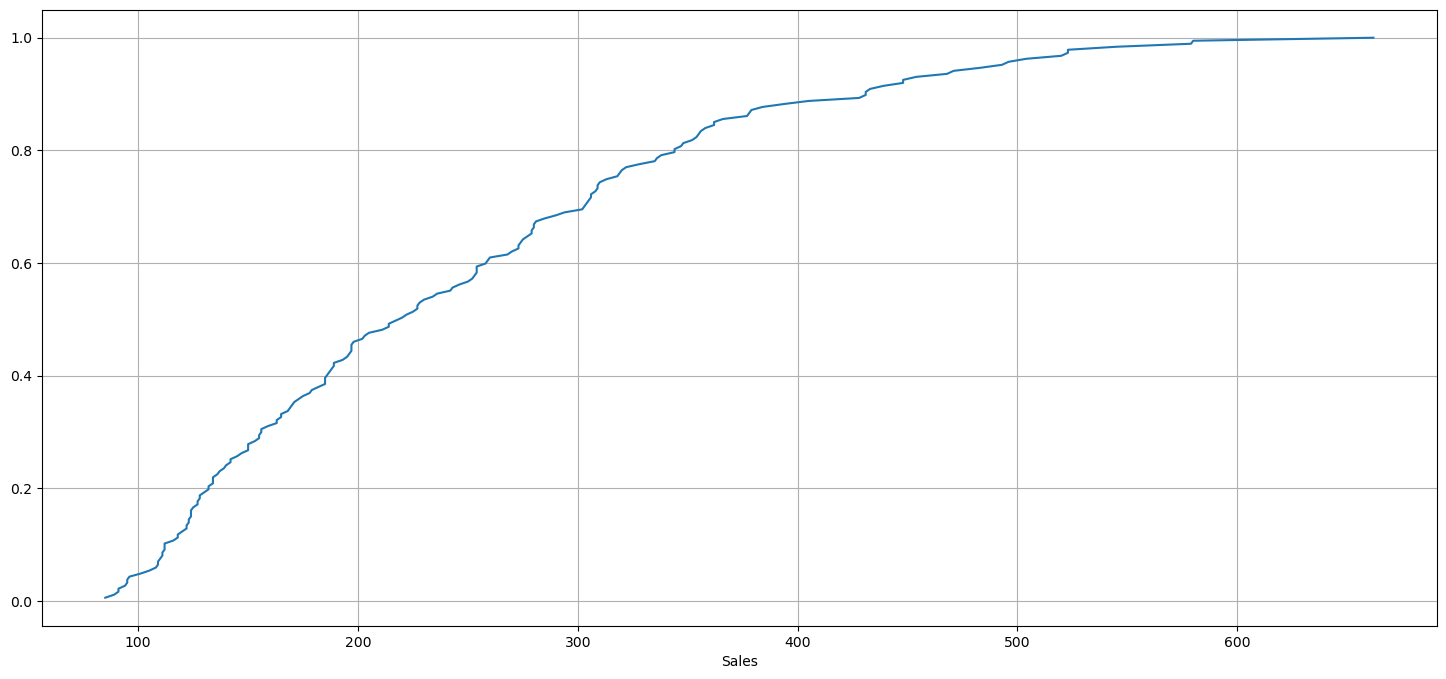

In [16]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Shoe_Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

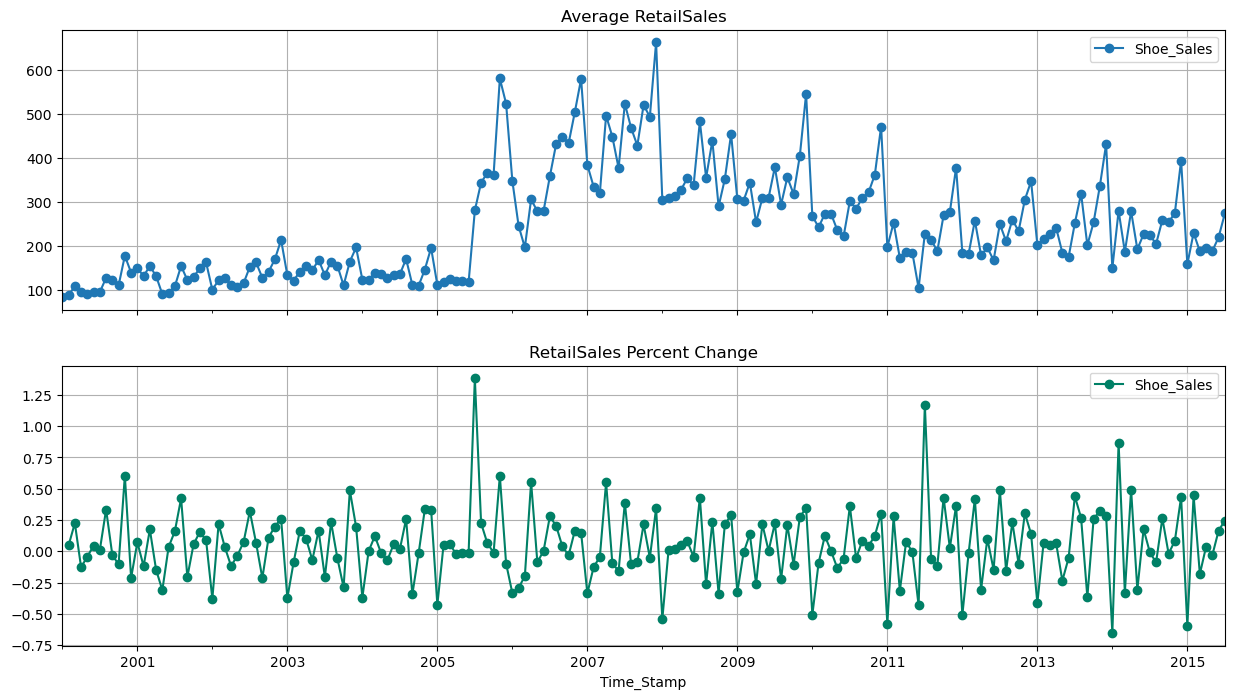

In [17]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["Shoe_Sales"].mean()
pct_change = df.groupby(df.index)["Shoe_Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average RetailSales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="RetailSales Percent Change",grid=True)

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss

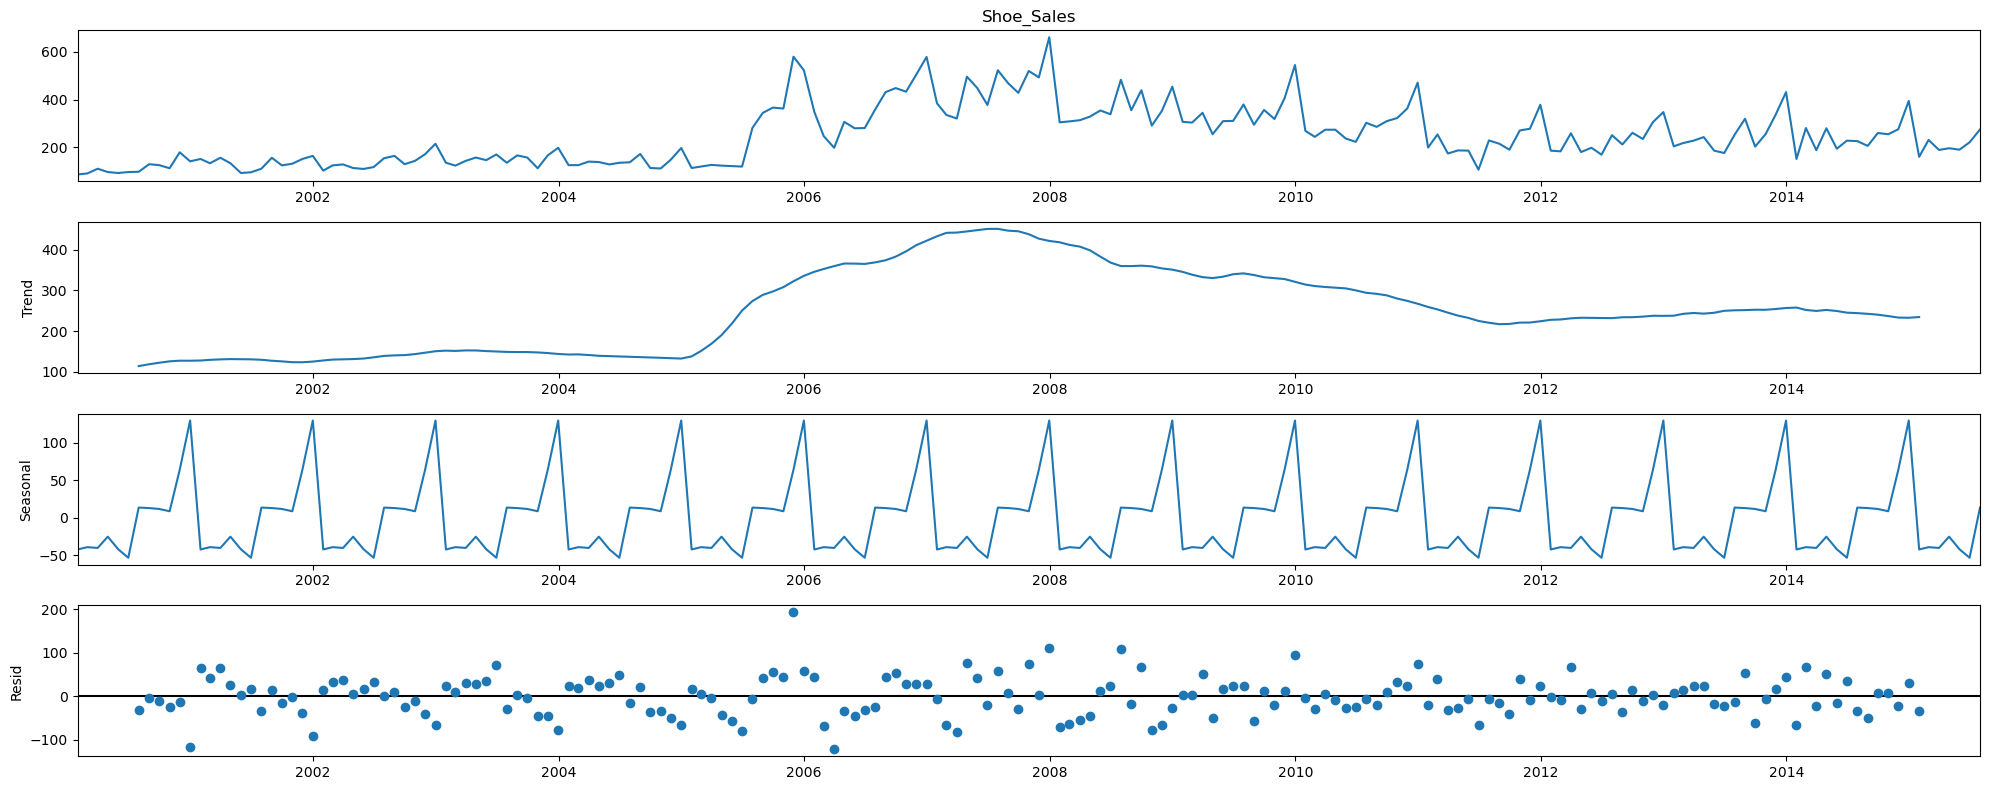

In [21]:
decomposition = seasonal_decompose(df['Shoe_Sales'],model='additive')
decomposition.plot();

In [22]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
2000-01-31           NaN
2000-02-29           NaN
2000-03-31           NaN
2000-04-30           NaN
2000-05-31           NaN
2000-06-30           NaN
2000-07-31    114.458333
2000-08-31    118.958333
2000-09-30    122.666667
2000-10-31    126.125000
2000-11-30    127.666667
2000-12-31    127.625000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
2000-01-31    -42.175463
2000-02-29    -39.062566
2000-03-31    -40.122090
2000-04-30    -25.092328
2000-05-31    -41.878042
2000-06-30    -53.208399
2000-07-31     13.741204
2000-08-31     13.077315
2000-09-30     11.866204
2000-10-31      8.835648
2000-11-30     64.152315
2000-12-31    129.866204
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
2000-01-31           NaN
2000-02-29           NaN
2000-03-31           NaN
2000-04-30           NaN
2000-05-31           NaN
2000-06-30           NaN
2000-07-31    -32.199537
2000-08-31     -4.035648
2000-09-30    -10.532870
2000-10-31    -23.960648
2000-11-30    -13.818

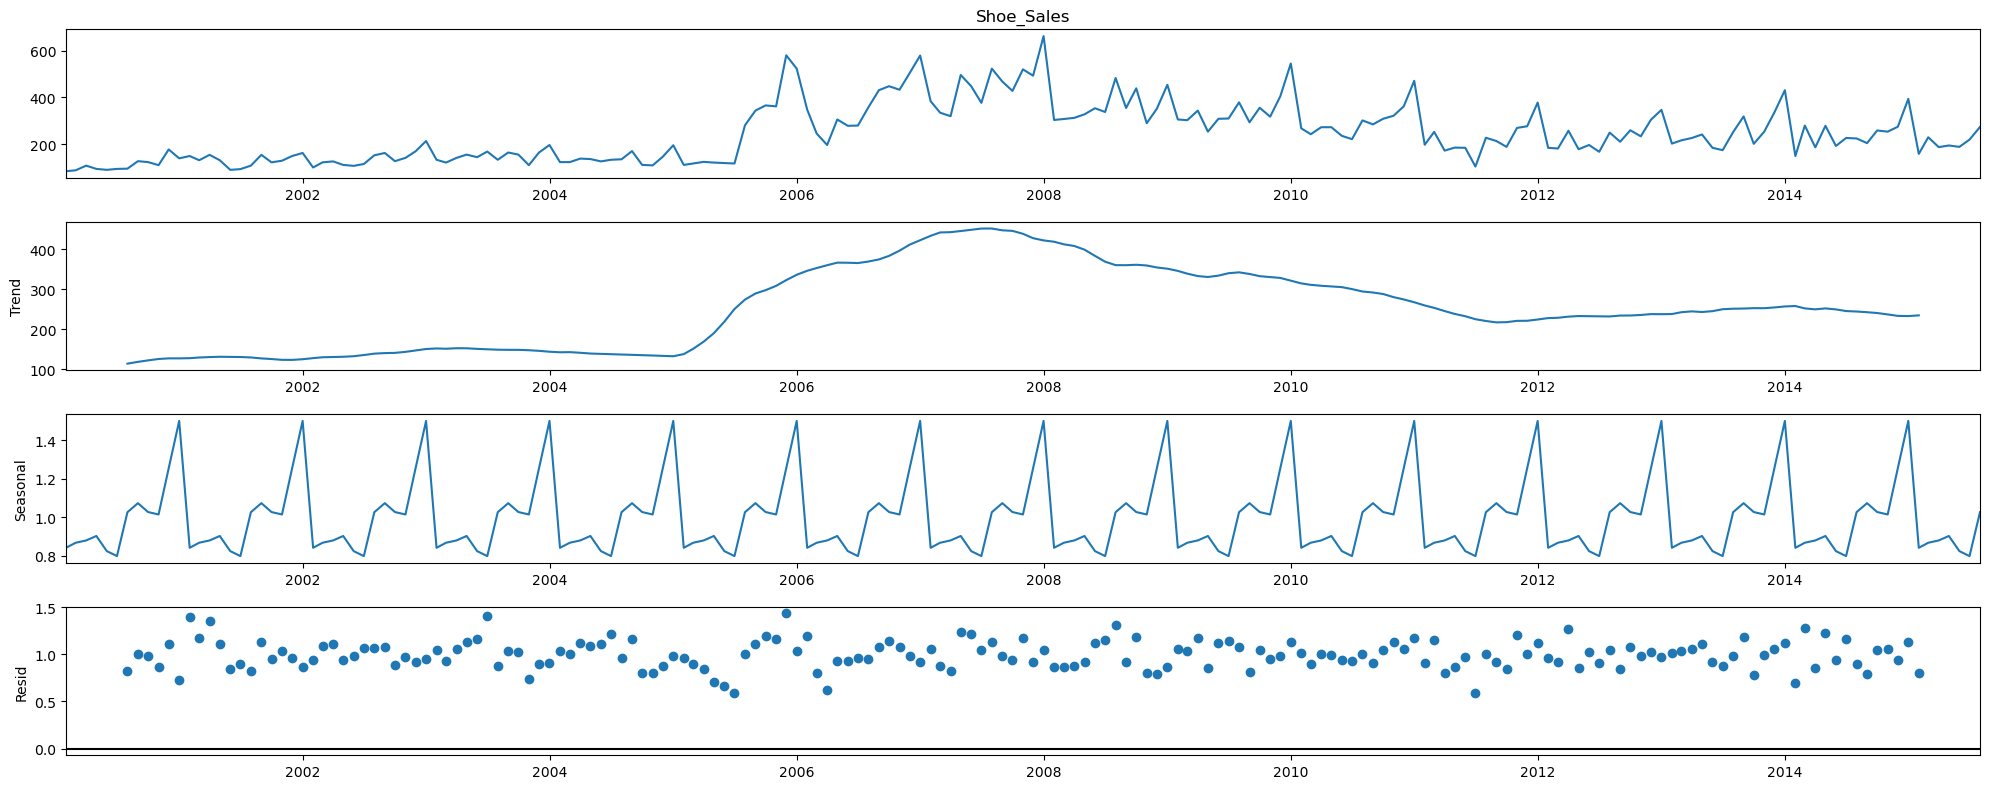

In [23]:
decomposition = seasonal_decompose(df['Shoe_Sales'],model='multiplicative')
decomposition.plot();

In [24]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
2000-01-31           NaN
2000-02-29           NaN
2000-03-31           NaN
2000-04-30           NaN
2000-05-31           NaN
2000-06-30           NaN
2000-07-31    114.458333
2000-08-31    118.958333
2000-09-30    122.666667
2000-10-31    126.125000
2000-11-30    127.666667
2000-12-31    127.625000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
2000-01-31    0.840405
2000-02-29    0.866682
2000-03-31    0.878675
2000-04-30    0.901826
2000-05-31    0.823141
2000-06-30    0.797254
2000-07-31    1.025527
2000-08-31    1.072445
2000-09-30    1.026307
2000-10-31    1.013557
2000-11-30    1.254223
2000-12-31    1.499958
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
2000-01-31         NaN
2000-02-29         NaN
2000-03-31         NaN
2000-04-30         NaN
2000-05-31         NaN
2000-06-30         NaN
2000-07-31    0.817856
2000-08-31    1.003322
2000-09-30    0.984958
2000-10-31    0.868308
2000-11-30    1.111649
2000-12-31    0.731330
Name: resid, dtype:

In [25]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

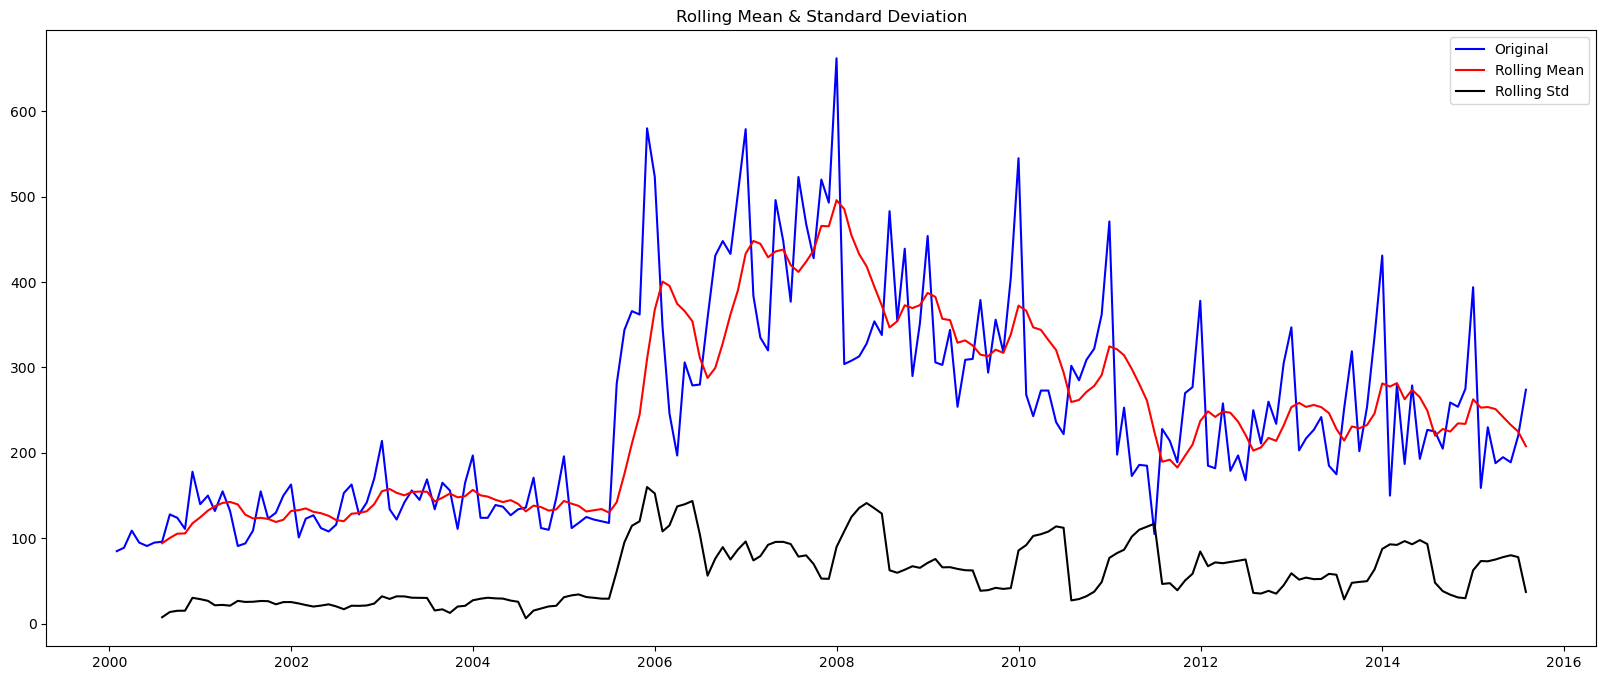

Results of Dickey-Fuller Test:
Test Statistic                  -1.717397
p-value                          0.422172
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [26]:
test_stationarity(df['Shoe_Sales'])

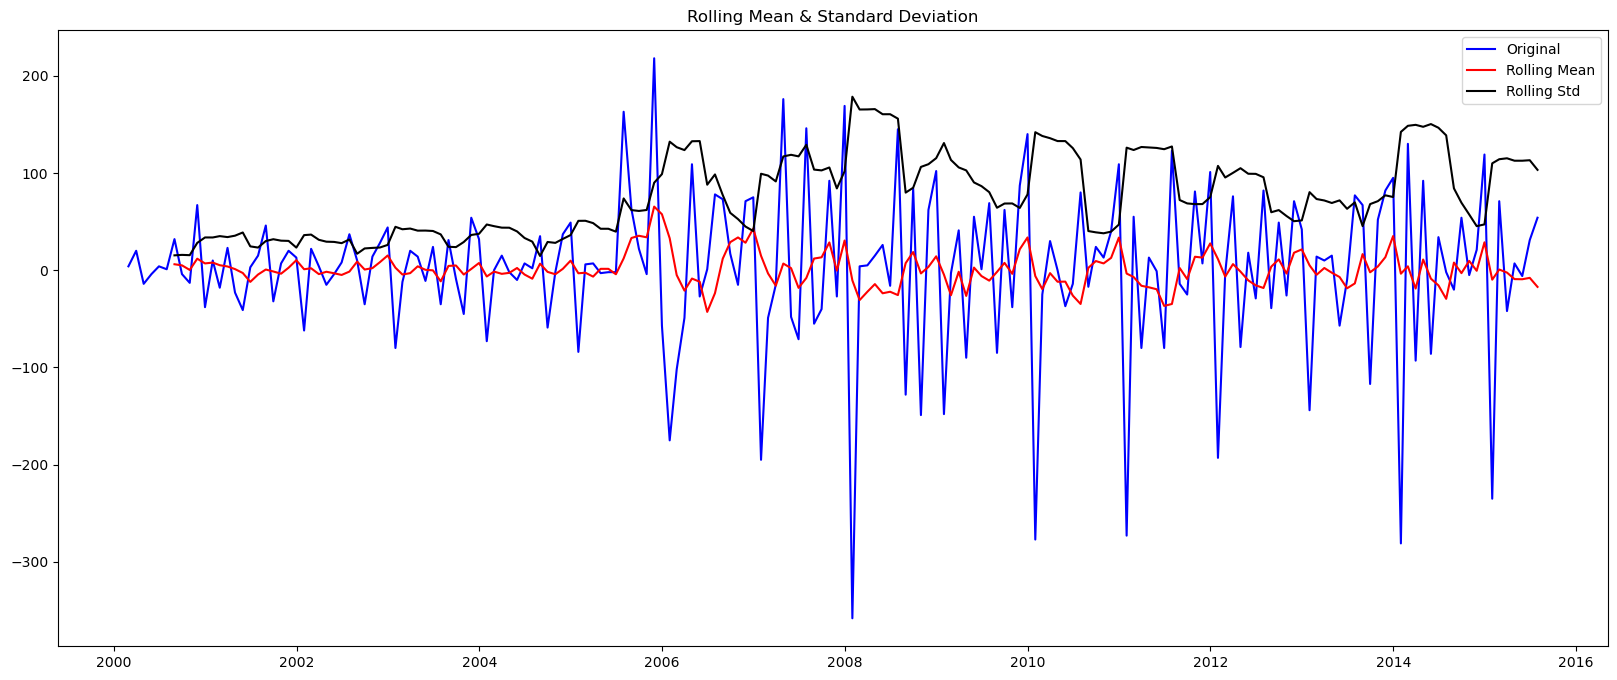

Results of Dickey-Fuller Test:
Test Statistic                  -3.479160
p-value                          0.008539
#Lags Used                      12.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [27]:
test_stationarity(df['Shoe_Sales'].diff().dropna())

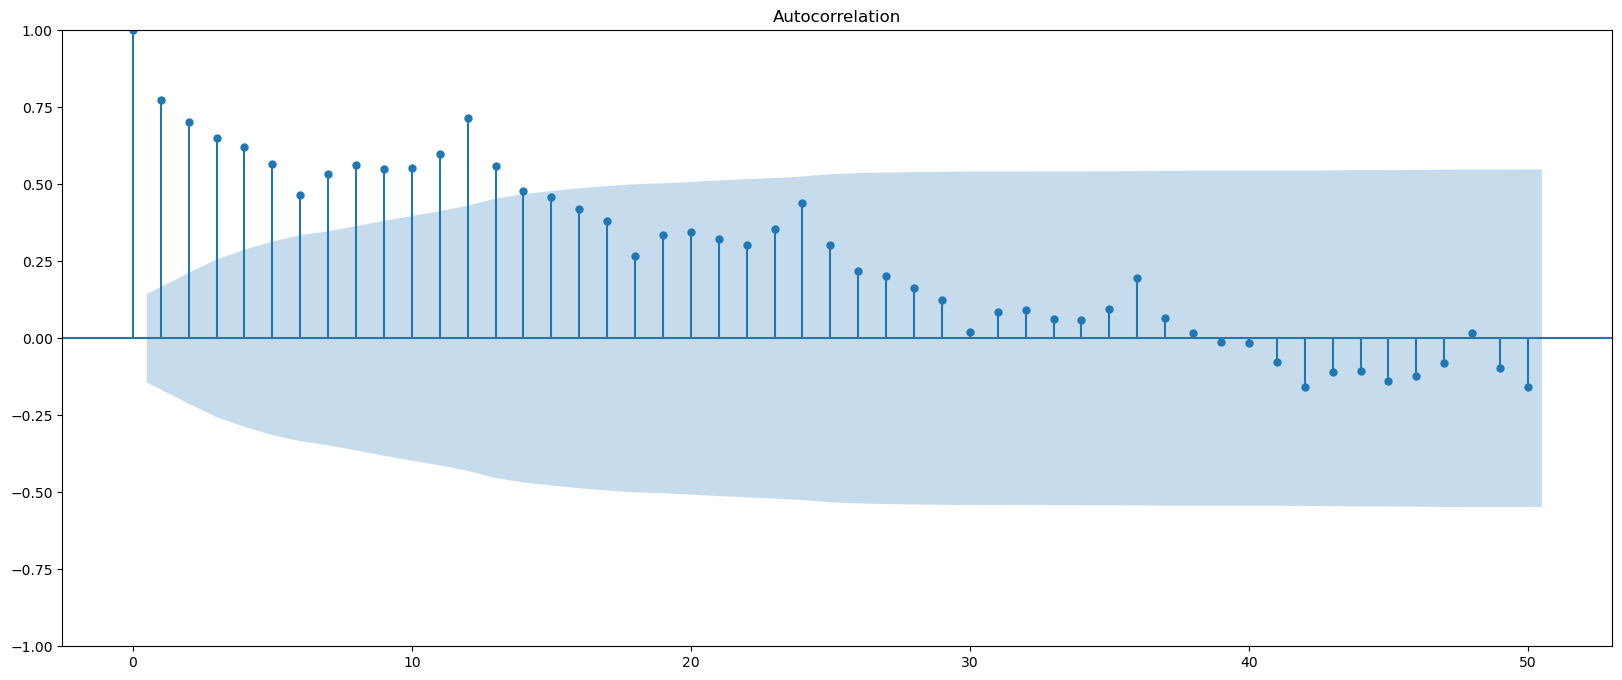

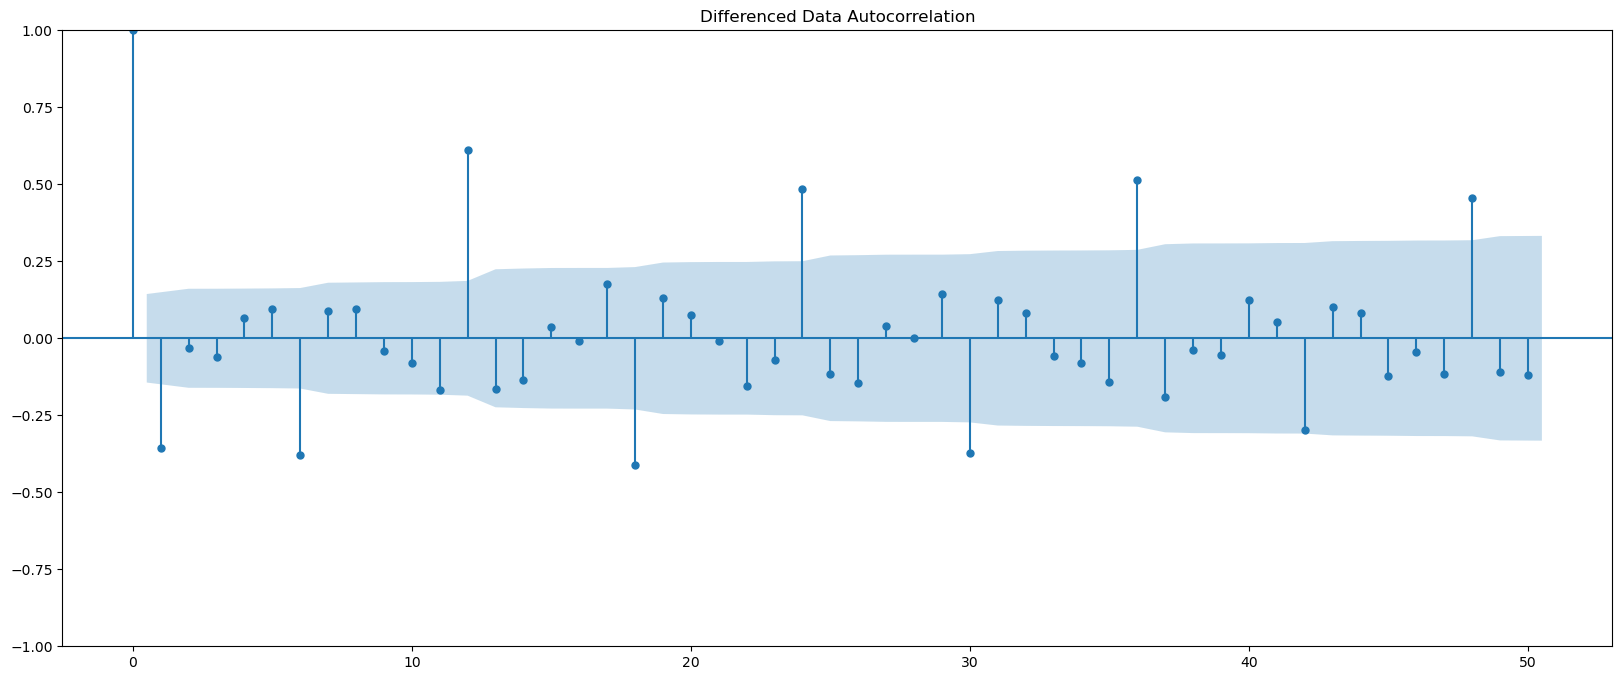

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Shoe_Sales'],lags=50)
plot_acf(df['Shoe_Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

C:\Users\imreh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


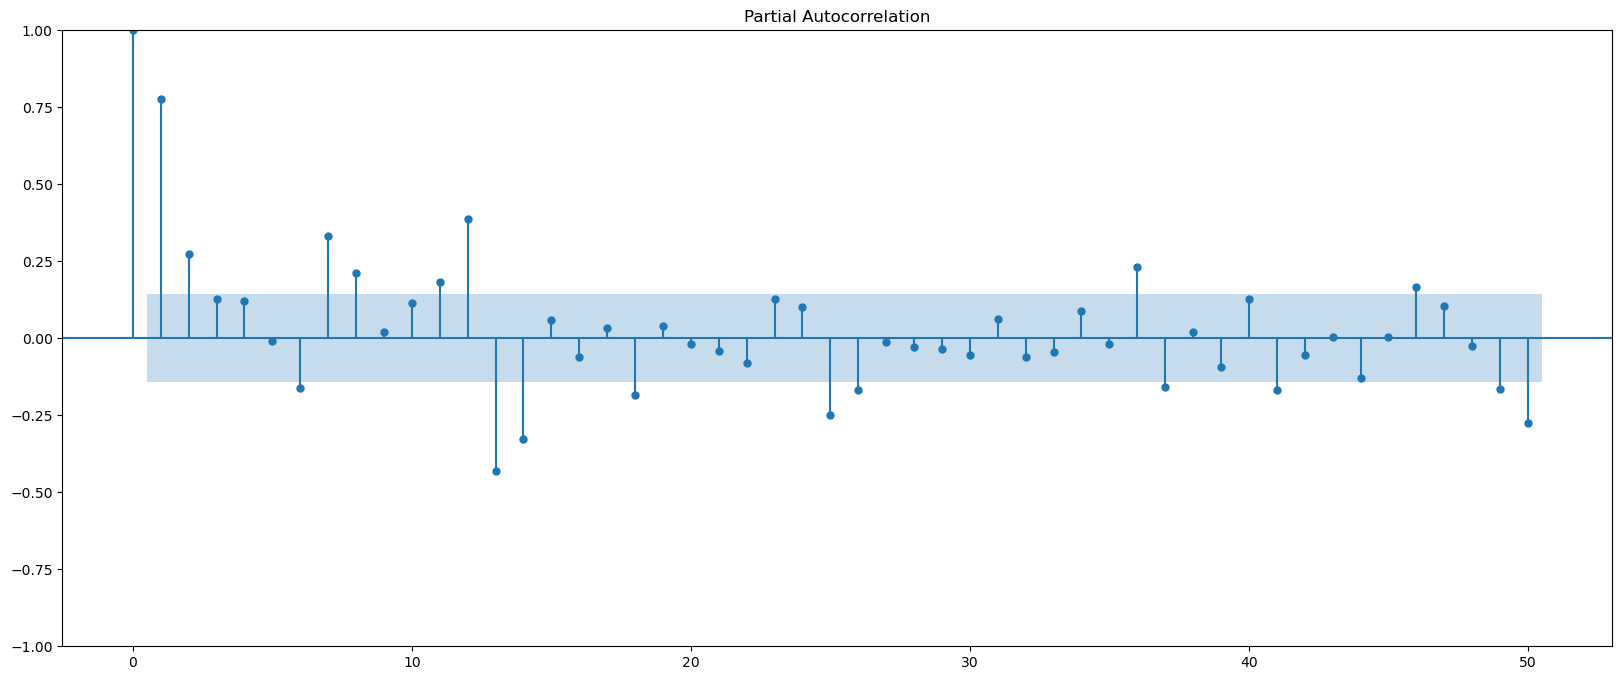

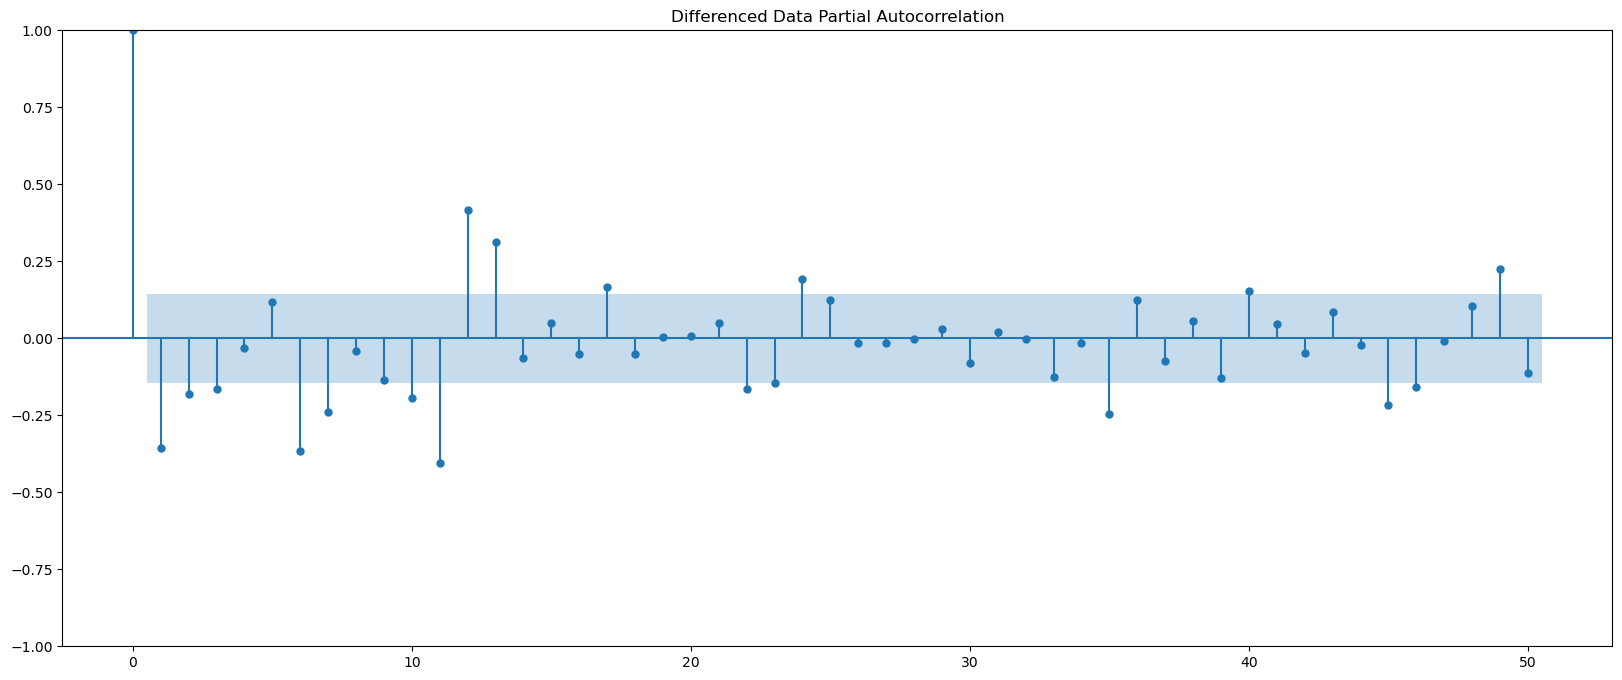

In [32]:
plot_pacf(df['Shoe_Sales'],lags=50)
plot_pacf(df['Shoe_Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [33]:
train=df[df.index.year < 2010]
test=df[df.index.year >= 2015]

In [34]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,YearMonth,Shoe_Sales
Time_Stamp,,
2000-01-31,1980-01,85
2000-02-29,1980-02,89
2000-03-31,1980-03,109
2000-04-30,1980-04,95
2000-05-31,1980-05,91


Last few rows of Training Data


,YearMonth,Shoe_Sales
Time_Stamp,,
2009-08-31,1989-08,294
2009-09-30,1989-09,356
2009-10-31,1989-10,318
2009-11-30,1989-11,405
2009-12-31,1989-12,545


First few rows of Test Data


,YearMonth,Shoe_Sales
Time_Stamp,,
2015-01-31,1995-01,159
2015-02-28,1995-02,230
2015-03-31,1995-03,188
2015-04-30,1995-04,195
2015-05-31,1995-05,189


Last few rows of Test Data


,YearMonth,Shoe_Sales
Time_Stamp,,
2015-03-31,1995-03,188
2015-04-30,1995-04,195
2015-05-31,1995-05,189
2015-06-30,1995-06,220
2015-07-31,1995-07,274


In [35]:
print(train.shape)
print(test.shape)

(120, 2)
(7, 2)


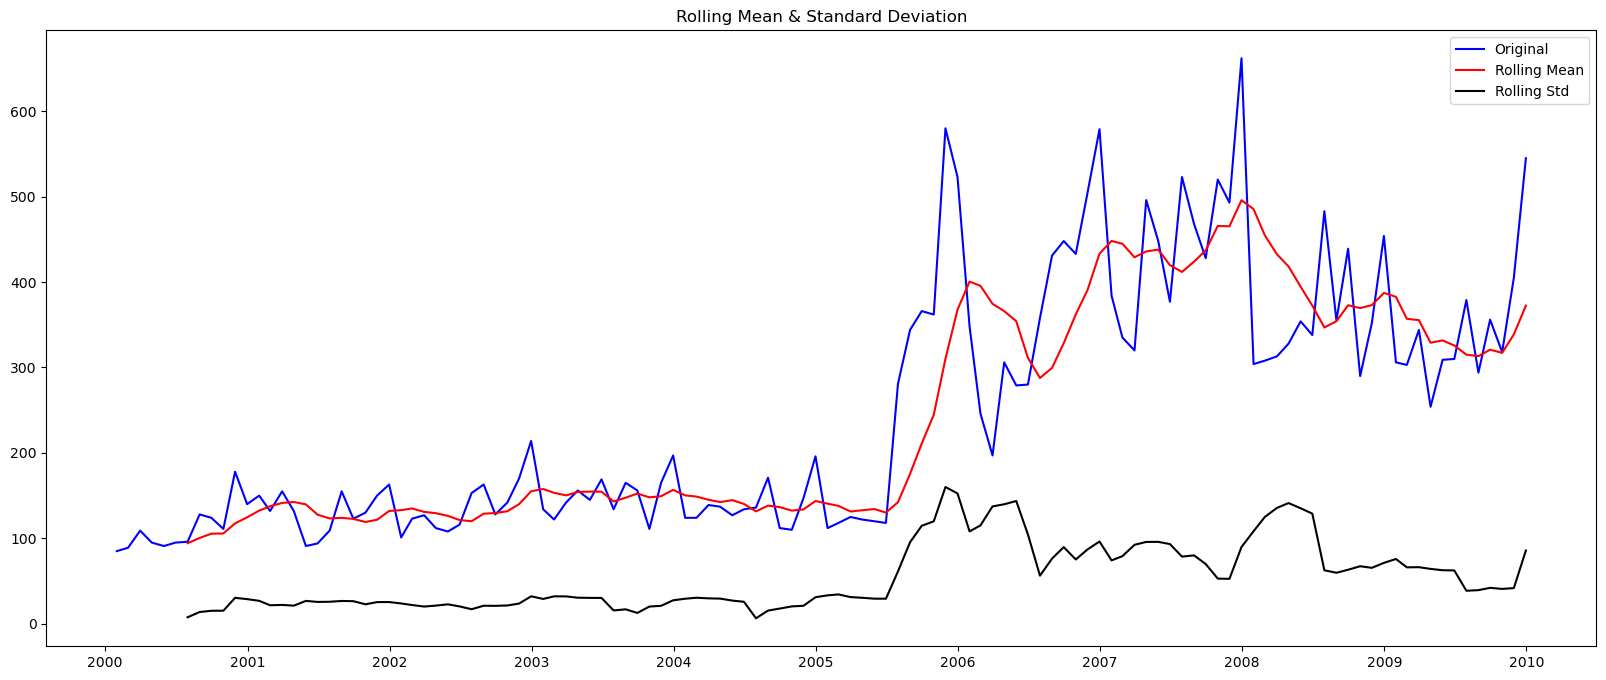

Results of Dickey-Fuller Test:
Test Statistic                  -1.004094
p-value                          0.751768
#Lags Used                      13.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64 



In [36]:
test_stationarity(train['Shoe_Sales'])

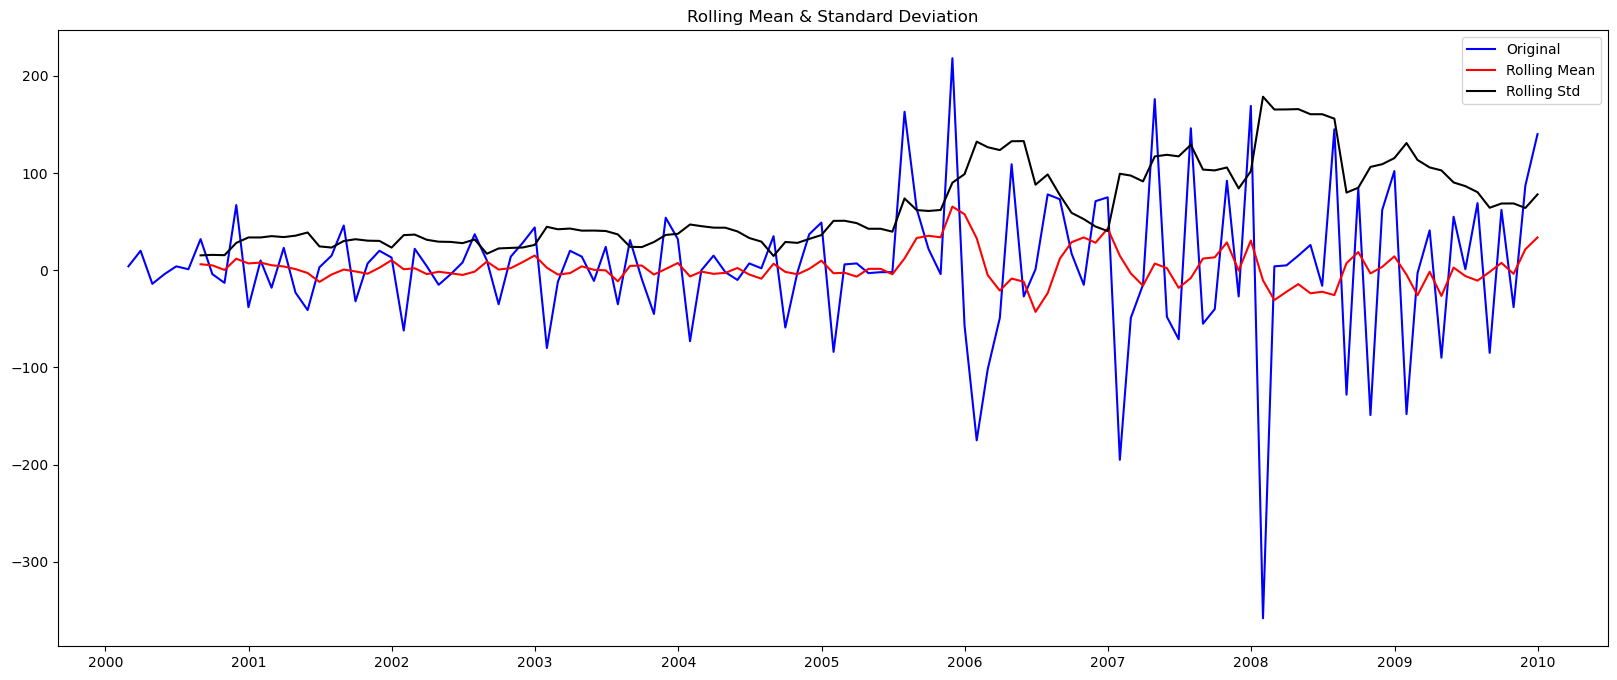

Results of Dickey-Fuller Test:
Test Statistic                  -2.897694
p-value                          0.045617
#Lags Used                      13.000000
Number of Observations Used    105.000000
Critical Value (1%)             -3.494220
Critical Value (5%)             -2.889485
Critical Value (10%)            -2.581676
dtype: float64 



In [37]:
test_stationarity(train['Shoe_Sales'].diff().dropna())

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2000-01-31 to 2009-12-31
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   YearMonth   120 non-null    object
 1   Shoe_Sales  120 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [39]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [40]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [41]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
